In [1]:
# pandasパッケージを、以降はpdという名前で呼び出しますという宣言です.
import pandas as pd

In [2]:
# データセットの読み込み(dfにcsvデータを読み込む)
# ここでは、本番用に用意した利用実績のデータを読み込みます
df = pd.read_csv("../data/transaction_history.csv")

In [3]:
df

,customer_id,product_id,purchase_date,purchase_amount,redeem_coupon,final_settlement_amount,payment_method,purchase_channel
0,23085,G03257PD,2020/3/13,7200,True,6200.0,現金,2.0
1,15469,CKZF21ZC,2023/3/29,15400,False,NaN,カード,2.0
2,15482,7NSE0G0R,2023/12/26,15400,False,NaN,現金,1.0
3,17107,WVCPYZBH,2021/2/19,17100,False,NaN,カード,2.0
4,24156,OELTJ7E2,2020/10/8,24100,True,23100.0,カード,1.0
...,...,...,...,...,...,...,...,...
458162,24236,YF829ECH,44820,188800,False,NaN,カード,1.0
458163,12691,SPDDDXY2,43903,177200,False,NaN,カード,2.0
458164,24355,UA56Q0XP,44572,141700,False,NaN,現金,2.0
458165,24126,G4WT97YC,43545,224400,False,NaN,現金,1.0


In [4]:
df.describe()

,customer_id,purchase_amount,final_settlement_amount,purchase_channel
count,458167.000000,458167.000000,16872.000000,458166.000000
mean,191266.920025,84456.761617,79702.982693,1.715837
std,83365.046865,96068.130787,90292.655099,0.917242
min,10000.000000,5000.000000,5035.000000,1.000000
25%,124531.500000,9300.000000,8835.000000,1.000000
50%,216051.000000,63000.000000,59565.000000,2.000000
75%,265586.000000,108600.000000,103402.000000,2.000000
max,287234.000000,981600.000000,843315.000000,6.000000


In [6]:
df.dtypes

customer_id                  int64
product_id                  object
purchase_date               object
purchase_amount              int64
redeem_coupon                 bool
final_settlement_amount    float64
payment_method              object
purchase_channel           float64
dtype: object

In [7]:
# pandasでデータ型を変換します
df["customer_id"] = df["customer_id"].astype("object")
df.dtypes

customer_id                 object
product_id                  object
purchase_date               object
purchase_amount              int64
redeem_coupon                 bool
final_settlement_amount    float64
payment_method              object
purchase_channel           float64
dtype: object

In [8]:
# 今回用意しているデータセットのcustomer_idは、00000001といった、いわゆるゼロ埋めの連番を数値を使っています。
# これを誤認識させないためには、取り込み時に「文字列として読み込む」ことが重要です。

# csutomer_idを文字列として指定し取り込み
df = pd.read_csv("../data/transaction_history.csv", dtype={"customer_id": str})
df.head()

,customer_id,product_id,purchase_date,purchase_amount,redeem_coupon,final_settlement_amount,payment_method,purchase_channel
0,00023085,G03257PD,2020/3/13,7200,True,6200.0,現金,2.0
1,00015469,CKZF21ZC,2023/3/29,15400,False,NaN,カード,2.0
2,00015482,7NSE0G0R,2023/12/26,15400,False,NaN,現金,1.0
3,00017107,WVCPYZBH,2021/2/19,17100,False,NaN,カード,2.0
4,00024156,OELTJ7E2,2020/10/8,24100,True,23100.0,カード,1.0


In [9]:
# 平均値の取得
print("平均", df["purchase_amount"].mean())

平均 84456.76161748882


In [10]:
# 中央値の取得
print("中央値", df["purchase_amount"].median())

中央値 63000.0


In [11]:
# 最頻値の取得
print("最頻値", df["purchase_amount"].mode())

最頻値 0    150000
Name: purchase_amount, dtype: int64


In [12]:
# 合計の取得
print("合計", df["purchase_amount"].sum())

合計 38695301100


In [13]:
# 分散と標準偏差の取得
print("分散", df["purchase_amount"].var(ddof=1))
# 標準偏差
print("標準偏差", df["purchase_amount"].std(ddof=1))

分散 9229085752.91564
標準偏差 96068.13078703904


In [14]:
# 最大値と最小値の取得
# 最大値
print("最大", df["purchase_amount"].max())
# 最小値
print("最小", df["purchase_amount"].min())

最大 981600
最小 5000


In [15]:
# 歪度と尖度の取得
# 歪度
print("歪度", df["purchase_amount"].skew())
# 尖度
print("尖度", df["purchase_amount"].kurt())

歪度 1.7914578693278291
尖度 3.7371607019147914


In [16]:
# purchase_dateのobject型をdatetime型に変換
df["purchase_date"] = pd.to_datetime(
    df["purchase_date"], format="%Y-%m-%d", errors="coerce"
)
df.dtypes

customer_id                        object
product_id                         object
purchase_date              datetime64[ns]
purchase_amount                     int64
redeem_coupon                        bool
final_settlement_amount           float64
payment_method                     object
purchase_channel                  float64
dtype: object

In [17]:
#ヒストグラムの描画に必要なライブラリをインポートします。
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 1.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'japanize-matplotlib' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'japanize-matplotlib'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=a9330880119c88c9f7cf5d8731dc04d80bb777a8e20f0d0c2bf3b089a091db78
  Stored in directory: /Users/maton/Library/Caches/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib

[notice] A new release of pip is availa

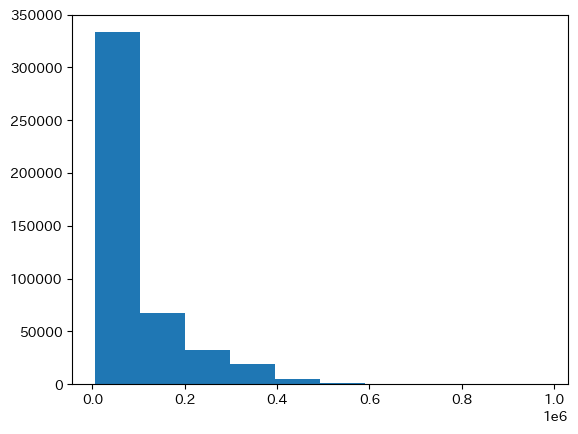

In [18]:
# ヒストグラムの描画
plt.hist(x=df["purchase_amount"], bins=10)  # bins:階級の数
plt.show()

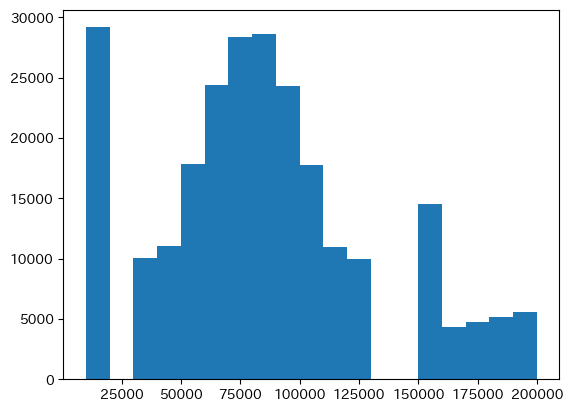

In [19]:
# ビンの幅を指定してみましょう。
bins = [
    10000,
    20000,
    30000,
    30000,
    40000,
    50000,
    60000,
    70000,
    80000,
    90000,
    100000,
    110000,
    120000,
    130000,
    140000,
    150000,
    160000,
    170000,
    180000,
    190000,
    200000,
]
plt.hist(x=df["purchase_amount"], bins=bins)
plt.show()

In [20]:
# 3シグマルールでの外れ値検出
mean_purchase = df["purchase_amount"].mean()  # 平均値
std_purchase = df["purchase_amount"].std()  # 標準偏差

# ±3シグマ範囲を計算
lower_limit = mean_purchase - 3 * std_purchase
upper_limit = mean_purchase + 3 * std_purchase

# 外れ値の抽出
outliers_sigma = df[
    (df["purchase_amount"] < lower_limit) | (df["purchase_amount"] > upper_limit)
]

# 外れ値の件数を表示
print(f"3シグマルールによる外れ値の件数: {len(outliers_sigma)}")
print("外れ値のデータ:")
outliers_sigma.head()

3シグマルールによる外れ値の件数: 8105
外れ値のデータ:


,customer_id,product_id,purchase_date,purchase_amount,redeem_coupon,final_settlement_amount,payment_method,purchase_channel
49,00010044,WFX6UYXX,NaT,408700,False,NaN,電子マネー,2.0
183,00010178,0JALBJS2,NaT,431300,False,NaN,コード決済,1.0
216,00010211,NF4GVAFA,NaT,427500,False,NaN,現金,1.0
235,00010230,38V3AJIU,NaT,385500,False,NaN,現金,5.0
249,00010244,UZM3TDTF,NaT,399400,False,NaN,現金,4.0


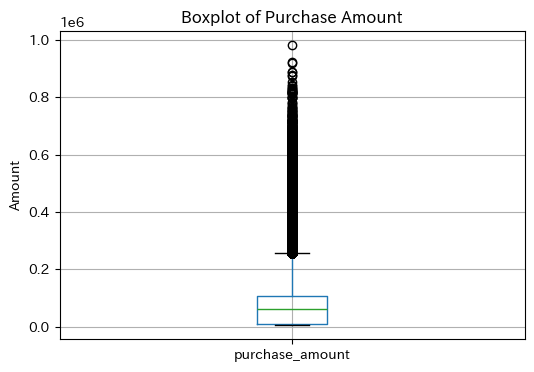

In [21]:
# dfのpurchase_amountの箱ひげ図を描画
plt.figure(figsize=(6, 4))
df.boxplot(column="purchase_amount")
plt.title("Boxplot of Purchase Amount")
plt.ylabel("Amount")
plt.grid(True)
plt.show()

In [22]:
# 外れ値の検出（IQRルール）
q1 = df["purchase_amount"].quantile(0.25)
q3 = df["purchase_amount"].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [23]:
# 外れ値の行を抽出
outliers = df[
    (df["purchase_amount"] < lower_bound) | (df["purchase_amount"] > upper_bound)
]
outliers

,customer_id,product_id,purchase_date,purchase_amount,redeem_coupon,final_settlement_amount,payment_method,purchase_channel
21,00010016,MQTY8P6S,NaT,286100,False,NaN,現金,2.0
24,00010019,N3R4MUJZ,NaT,348100,False,NaN,カード,1.0
49,00010044,WFX6UYXX,NaT,408700,False,NaN,電子マネー,2.0
61,00010056,22KUXMYI,NaT,288600,False,NaN,カード,1.0
62,00010057,3VTRPCMJ,NaT,278700,False,NaN,カード,2.0
...,...,...,...,...,...,...,...,...
458108,00287181,B5PAWT1T,NaT,339800,False,NaN,コード決済,2.0
458121,00287194,WRH06AKB,NaT,300000,False,NaN,現金,1.0
458125,00287198,E6SBIX29,NaT,411400,False,NaN,電子マネー,2.0
458126,00287199,E6SBIX29,NaT,402900,False,NaN,電子マネー,2.0
